In [2]:
# Multiple datasets from kaggle have been merged to make a common Formula 1 dataset that compares the performances of cars based on 2 factors
# natural factors - Altitude and climate of the venue.
import pandas as pd
df1 = pd.read_csv('constructorResults.csv')
df1

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,NaN
1,2,18,2,8.0,NaN
2,3,18,3,9.0,NaN
3,4,18,4,5.0,NaN
4,5,18,5,2.0,NaN
...,...,...,...,...,...
11137,15635,988,1,2.0,NaN
11138,15636,988,3,1.0,NaN
11139,15637,988,210,0.0,NaN
11140,15638,988,15,0.0,NaN


In [3]:
df2 = pd.read_csv('races.csv')
df2 = df2[df2.year >= 2013]
df2

,raceId,year,round,circuitId,name,date,time,url
878,880,2013,1,1,Australian Grand Prix,2013-03-17,06:00:00,http://en.wikipedia.org/wiki/2013_Australian_G...
879,881,2013,2,2,Malaysian Grand Prix,2013-03-24,08:00:00,http://en.wikipedia.org/wiki/2013_Malaysian_Gr...
880,882,2013,3,17,Chinese Grand Prix,2013-04-14,07:00:00,http://en.wikipedia.org/wiki/2013_Chinese_Gran...
881,883,2013,4,3,Bahrain Grand Prix,2013-04-21,12:00:00,http://en.wikipedia.org/wiki/2013_Bahrain_Gran...
882,884,2013,5,4,Spanish Grand Prix,2013-05-12,12:00:00,http://en.wikipedia.org/wiki/2013_Spanish_Gran...
...,...,...,...,...,...,...,...,...
992,1005,2018,17,22,Japanese Grand Prix,2018-10-07,05:00:00,http://en.wikipedia.org/wiki/2018_Japanese_Gra...
993,1006,2018,18,69,United States Grand Prix,2018-10-21,19:00:00,http://en.wikipedia.org/wiki/2018_United_State...
994,1007,2018,19,32,Mexican Grand Prix,2018-10-28,19:00:00,http://en.wikipedia.org/wiki/2018_Mexican_Gran...
995,1008,2018,20,18,Brazilian Grand Prix,2018-11-11,16:00:00,http://en.wikipedia.org/wiki/2018_Brazilian_Gr...


In [4]:
df3 = pd.read_csv('circuits.csv')
df3

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10.0,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,50.0,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,1.0,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmelo,Spain,41.57000,2.26111,190.0,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,NaN,http://en.wikipedia.org/wiki/Istanbul_Park
...,...,...,...,...,...,...,...,...,...
68,69,americas,Circuit of the Americas,Austin,USA,30.13280,-97.64110,160.0,http://en.wikipedia.org/wiki/Circuit_of_the_Am...
69,70,red_bull_ring,Red Bull Ring,Spielburg,Austria,47.21970,14.76470,700.0,http://en.wikipedia.org/wiki/Red_Bull_Ring
70,71,sochi,Sochi Autodrom,Sochi,Russia,43.40570,39.95780,20.0,http://en.wikipedia.org/wiki/Sochi_Autodrom
71,72,port_imperial,Port Imperial Street Circuit,New Jersey,USA,40.77690,-74.01110,NaN,http://en.wikipedia.org/wiki/Port_Imperial_Str...


In [5]:
dfmain = df1.merge(df2, on= 'raceId')
dfmain = dfmain.merge(df3, on= 'circuitId')
df4 = pd.read_csv('constructors.csv')
dfmain = dfmain.merge(df4, on='constructorId')
dfmain = dfmain.drop(['status','Unnamed: 5'], axis = 1)
dfmain

,constructorResultsId,raceId,constructorId,points,year,round,circuitId,name_x,date,time,...,location,country,lat,lng,alt,url_y,constructorRef,name,nationality,url
0,14596,880,208,26.0,2013,1,1,Australian Grand Prix,2013-03-17,06:00:00,...,Melbourne,Australia,-37.84970,144.9680,10.0,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,lotus_f1,Lotus F1,British,http://en.wikipedia.org/wiki/Lotus_F1
1,14817,900,208,0.0,2014,1,1,Australian Grand Prix,2014-03-16,06:00:00,...,Melbourne,Australia,-37.84970,144.9680,10.0,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,lotus_f1,Lotus F1,British,http://en.wikipedia.org/wiki/Lotus_F1
2,15023,926,208,0.0,2015,1,1,Australian Grand Prix,2015-03-15,05:00:00,...,Melbourne,Australia,-37.84970,144.9680,10.0,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,lotus_f1,Lotus F1,British,http://en.wikipedia.org/wiki/Lotus_F1
3,14610,881,208,14.0,2013,2,2,Malaysian Grand Prix,2013-03-24,08:00:00,...,Kuala Lumpur,Malaysia,2.76083,101.7380,50.0,http://en.wikipedia.org/wiki/Sepang_Internatio...,lotus_f1,Lotus F1,British,http://en.wikipedia.org/wiki/Lotus_F1
4,14826,901,208,0.0,2014,2,2,Malaysian Grand Prix,2014-03-30,08:00:00,...,Kuala Lumpur,Malaysia,2.76083,101.7380,50.0,http://en.wikipedia.org/wiki/Sepang_Internatio...,lotus_f1,Lotus F1,British,http://en.wikipedia.org/wiki/Lotus_F1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,15164,941,209,0.0,2015,15,71,Russian Grand Prix,2015-10-11,11:00:00,...,Sochi,Russia,43.40570,39.9578,20.0,http://en.wikipedia.org/wiki/Sochi_Autodrom,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
1034,15251,951,209,0.0,2016,4,71,Russian Grand Prix,2016-05-01,12:00:00,...,Sochi,Russia,43.40570,39.9578,20.0,http://en.wikipedia.org/wiki/Sochi_Autodrom,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
1035,15196,943,209,0.0,2015,17,32,Mexican Grand Prix,2015-11-01,19:00:00,...,Mexico City,Mexico,19.40420,-99.0907,2300.0,http://en.wikipedia.org/wiki/Aut%C3%B3dromo_He...,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
1036,15416,966,209,0.0,2016,19,32,Mexican Grand Prix,2016-10-30,19:00:00,...,Mexico City,Mexico,19.40420,-99.0907,2300.0,http://en.wikipedia.org/wiki/Aut%C3%B3dromo_He...,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport


In [6]:
#We will be looking at data from the following years

dfmain['year'].unique()

array([2013, 2014, 2015, 2016, 2017], dtype=int64)

In [7]:
dfsum = dfmain.groupby('name').agg('sum').reset_index()
dfsum[['name','points']].sort_values(by= 'points', ascending = False)

,name,points
8,Mercedes,3197.0
9,Red Bull,2024.0
1,Ferrari,1918.0
13,Williams,809.0
2,Force India,728.0
7,McLaren,436.0
4,Lotus F1,403.0
12,Toro Rosso,246.0
11,Sauber,100.0
3,Haas F1 Team,76.0


In [8]:
dfmain['name_x'].unique()

array(['Australian Grand Prix', 'Malaysian Grand Prix',
       'Chinese Grand Prix', 'Bahrain Grand Prix', 'Spanish Grand Prix',
       'Monaco Grand Prix', 'Canadian Grand Prix', 'British Grand Prix',
       'German Grand Prix', 'Hungarian Grand Prix', 'Belgian Grand Prix',
       'Italian Grand Prix', 'Singapore Grand Prix', 'Korean Grand Prix',
       'Japanese Grand Prix', 'Indian Grand Prix', 'Abu Dhabi Grand Prix',
       'United States Grand Prix', 'Brazilian Grand Prix',
       'Austrian Grand Prix', 'Russian Grand Prix', 'Mexican Grand Prix',
       'European Grand Prix', 'Azerbaijan Grand Prix'], dtype=object)

In [9]:
dfmain[['alt','name','points']]

,alt,name,points
0,10.0,Lotus F1,26.0
1,10.0,Lotus F1,0.0
2,10.0,Lotus F1,0.0
3,50.0,Lotus F1,14.0
4,50.0,Lotus F1,0.0
...,...,...,...
1033,20.0,Manor Marussia,0.0
1034,20.0,Manor Marussia,0.0
1035,2300.0,Manor Marussia,0.0
1036,2300.0,Manor Marussia,0.0


In [10]:
dfwin = dfmain[dfmain.points >= 1]
dfwin['points']

0       26.0
3       14.0
6       20.0
8        6.0
9       33.0
        ... 
987      6.0
989      1.0
993      6.0
994      4.0
1031     1.0
Name: points, Length: 640, dtype: float64

In [11]:
'''
Here we look at the difference circuit track altitudes have on the performance of F1 cars.
'''

'\nHere we look at the difference circuit track altitudes have on the performance of F1 cars.\n'

In [12]:
dfhighalt = dfwin[dfwin.alt > 500].sort_values(by = 'points', ascending = False)

In [13]:
dfhighalt['name'].mode()

0    Mercedes
1    Red Bull
Name: name, dtype: object

In [14]:
dfhighaltteam = dfhighalt.groupby('name').agg('sum').reset_index()
dfhighaltteam[['name','points']].sort_values(by = 'points', ascending = False)

,name,points
6,Mercedes,437.0
0,Ferrari,223.0
7,Red Bull,218.0
11,Williams,126.0
1,Force India,95.0
5,McLaren,54.0
10,Toro Rosso,21.0
2,Haas F1 Team,18.0
3,Lotus F1,12.0
9,Sauber,6.0


<AxesSubplot: xlabel='name'>

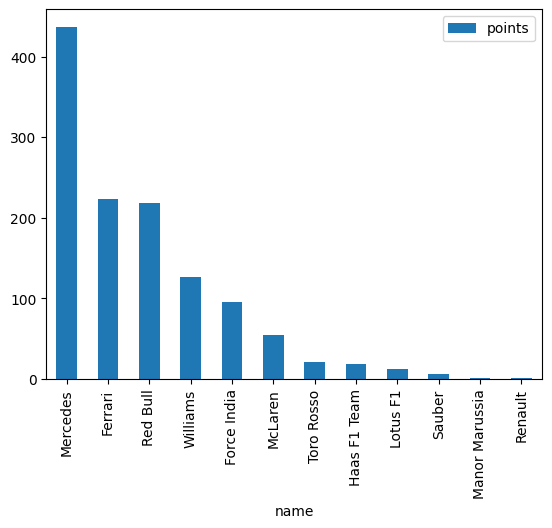

In [15]:
dfhighaltteam[['name','points']].sort_values(by = 'points', ascending = False).plot.bar(x='name',y='points')

In [16]:
dflowalt = dfmain[dfmain.alt <= 500].sort_values(by = 'points', ascending = False)
dflowalt

,constructorResultsId,raceId,constructorId,points,year,round,circuitId,name_x,date,time,...,location,country,lat,lng,alt,url_y,constructorRef,name,nationality,url
813,15006,918,3,66.0,2014,19,24,Abu Dhabi Grand Prix,2014-11-23,13:00:00,...,Abu Dhabi,UAE,24.46720,54.60310,10.0,http://en.wikipedia.org/wiki/Yas_Marina_Circuit,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
322,15005,918,131,50.0,2014,19,24,Abu Dhabi Grand Prix,2014-11-23,13:00:00,...,Abu Dhabi,UAE,24.46720,54.60310,10.0,http://en.wikipedia.org/wiki/Yas_Marina_Circuit,mercedes,Mercedes,German,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...
344,15241,951,131,43.0,2016,4,71,Russian Grand Prix,2016-05-01,12:00:00,...,Sochi,Russia,43.40570,39.95780,20.0,http://en.wikipedia.org/wiki/Sochi_Autodrom,mercedes,Mercedes,German,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...
163,15373,963,9,43.0,2016,16,2,Malaysian Grand Prix,2016-10-02,07:00:00,...,Kuala Lumpur,Malaysia,2.76083,101.73800,50.0,http://en.wikipedia.org/wiki/Sepang_Internatio...,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing
305,14941,912,131,43.0,2014,13,14,Italian Grand Prix,2014-09-07,12:00:00,...,Monza,Italy,45.61560,9.28111,150.0,http://en.wikipedia.org/wiki/Autodromo_Naziona...,mercedes,Mercedes,German,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,15371,962,15,0.0,2016,15,15,Singapore Grand Prix,2016-09-18,12:00:00,...,Marina Bay,Singapore,1.29140,103.86400,20.0,http://en.wikipedia.org/wiki/Marina_Bay_Street...,sauber,Sauber,Swiss,http://en.wikipedia.org/wiki/Sauber
702,14962,913,15,0.0,2014,14,15,Singapore Grand Prix,2014-09-21,12:00:00,...,Marina Bay,Singapore,1.29140,103.86400,20.0,http://en.wikipedia.org/wiki/Marina_Bay_Street...,sauber,Sauber,Swiss,http://en.wikipedia.org/wiki/Sauber
700,15568,981,15,0.0,2017,13,14,Italian Grand Prix,2017-09-03,12:00:00,...,Monza,Italy,45.61560,9.28111,150.0,http://en.wikipedia.org/wiki/Autodromo_Naziona...,sauber,Sauber,Swiss,http://en.wikipedia.org/wiki/Sauber
699,15359,961,15,0.0,2016,14,14,Italian Grand Prix,2016-09-04,12:00:00,...,Monza,Italy,45.61560,9.28111,150.0,http://en.wikipedia.org/wiki/Autodromo_Naziona...,sauber,Sauber,Swiss,http://en.wikipedia.org/wiki/Sauber


In [17]:
dflowalt['name'].mode()

0    Williams
Name: name, dtype: object

In [18]:
dflowaltteam = dflowalt.groupby('name').agg('sum').reset_index()
dflowaltteam[['name','points']].sort_values(by = 'points', ascending = False)

,name,points
8,Mercedes,2760.0
9,Red Bull,1806.0
1,Ferrari,1695.0
13,Williams,683.0
2,Force India,633.0
4,Lotus F1,391.0
7,McLaren,382.0
12,Toro Rosso,225.0
11,Sauber,94.0
10,Renault,64.0


<AxesSubplot: xlabel='name'>

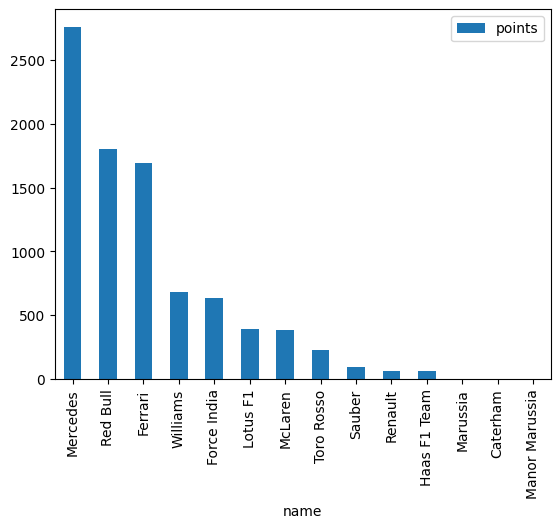

In [19]:
dflowaltteam[['name','points']].sort_values(by = 'points', ascending = False).plot.bar(x='name',y='points')

In [20]:
# Difference in the performances of a car due to the climate of the location
# The following grand prix are considered to be held in warm places
warm = ['Australian Grand Prix', 'Malaysian Grand Prix',
       'Chinese Grand Prix', 'Bahrain Grand Prix', 'Spanish Grand Prix',
       'Monaco Grand Prix','Singapore Grand Prix', 'Korean Grand Prix',
       'Japanese Grand Prix', 'Indian Grand Prix', 'Abu Dhabi Grand Prix','Monaco Grand Prix',
       'United States Grand Prix', 'Brazilian Grand Prix','Azerbaijan Grand Prix', 'European Grand Prix']
#The following grand prix are considered to be in colder places
cold = ['Canadian Grand Prix', 'British Grand Prix',
       'German Grand Prix', 'Hungarian Grand Prix', 'Belgian Grand Prix',
       'Italian Grand Prix','Austrian Grand Prix', 'Russian Grand Prix']


In [21]:
dfwarmclimate = dfwin[dfwin.name_x.isin(warm)]
dfwarmclimate

,constructorResultsId,raceId,constructorId,points,year,round,circuitId,name_x,date,time,...,location,country,lat,lng,alt,url_y,constructorRef,name,nationality,url
0,14596,880,208,26.0,2013,1,1,Australian Grand Prix,2013-03-17,06:00:00,...,Melbourne,Australia,-37.84970,144.9680,10.0,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,lotus_f1,Lotus F1,British,http://en.wikipedia.org/wiki/Lotus_F1
3,14610,881,208,14.0,2013,2,2,Malaysian Grand Prix,2013-03-24,08:00:00,...,Kuala Lumpur,Malaysia,2.76083,101.7380,50.0,http://en.wikipedia.org/wiki/Sepang_Internatio...,lotus_f1,Lotus F1,British,http://en.wikipedia.org/wiki/Lotus_F1
6,14619,882,208,20.0,2013,3,17,Chinese Grand Prix,2013-04-14,07:00:00,...,Shanghai,China,31.33890,121.2200,10.0,http://en.wikipedia.org/wiki/Shanghai_Internat...,lotus_f1,Lotus F1,British,http://en.wikipedia.org/wiki/Lotus_F1
8,15037,928,208,6.0,2015,3,17,Chinese Grand Prix,2015-04-12,06:00:00,...,Shanghai,China,31.33890,121.2200,10.0,http://en.wikipedia.org/wiki/Shanghai_Internat...,lotus_f1,Lotus F1,British,http://en.wikipedia.org/wiki/Lotus_F1
9,14630,883,208,33.0,2013,4,3,Bahrain Grand Prix,2013-04-21,12:00:00,...,Sakhir,Bahrain,26.03250,50.5106,1.0,http://en.wikipedia.org/wiki/Bahrain_Internati...,lotus_f1,Lotus F1,British,http://en.wikipedia.org/wiki/Lotus_F1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,15368,962,4,1.0,2016,15,15,Singapore Grand Prix,2016-09-18,12:00:00,...,Marina Bay,Singapore,1.29140,103.8640,20.0,http://en.wikipedia.org/wiki/Marina_Bay_Street...,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_F1
981,15574,982,4,8.0,2017,14,15,Singapore Grand Prix,2017-09-17,12:00:00,...,Marina Bay,Singapore,1.29140,103.8640,20.0,http://en.wikipedia.org/wiki/Marina_Bay_Street...,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_F1
985,15633,988,4,8.0,2017,20,24,Abu Dhabi Grand Prix,2017-11-26,13:00:00,...,Abu Dhabi,UAE,24.46720,54.6031,10.0,http://en.wikipedia.org/wiki/Yas_Marina_Circuit,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_F1
987,15604,985,4,6.0,2017,17,69,United States Grand Prix,2017-10-22,19:00:00,...,Austin,USA,30.13280,-97.6411,160.0,http://en.wikipedia.org/wiki/Circuit_of_the_Am...,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_F1


In [22]:
dfcoldclimate = dfwin[dfwin.name_x.isin(cold)]
dfcoldclimate

,constructorResultsId,raceId,constructorId,points,year,round,circuitId,name_x,date,time,...,location,country,lat,lng,alt,url_y,constructorRef,name,nationality,url
18,14667,886,208,2.0,2013,7,7,Canadian Grand Prix,2013-06-09,18:00:00,...,Montreal,Canada,45.5000,-73.52280,18.0,http://en.wikipedia.org/wiki/Circuit_Gilles_Vi...,lotus_f1,Lotus F1,British,http://en.wikipedia.org/wiki/Lotus_F1
20,15077,932,208,7.0,2015,7,7,Canadian Grand Prix,2015-06-07,18:00:00,...,Montreal,Canada,45.5000,-73.52280,18.0,http://en.wikipedia.org/wiki/Circuit_Gilles_Vi...,lotus_f1,Lotus F1,British,http://en.wikipedia.org/wiki/Lotus_F1
21,14676,887,208,10.0,2013,8,9,British Grand Prix,2013-06-30,12:00:00,...,Silverstone,UK,52.0786,-1.01694,200.0,http://en.wikipedia.org/wiki/Silverstone_Circuit,lotus_f1,Lotus F1,British,http://en.wikipedia.org/wiki/Lotus_F1
24,14685,888,208,33.0,2013,9,20,German Grand Prix,2013-07-07,12:00:00,...,Nurburg,Germany,50.3356,6.94750,150.0,http://en.wikipedia.org/wiki/N%C3%BCrburgring,lotus_f1,Lotus F1,British,http://en.wikipedia.org/wiki/Lotus_F1
25,14696,890,208,26.0,2013,10,11,Hungarian Grand Prix,2013-07-28,12:00:00,...,Budapest,Hungary,47.5789,19.24860,240.0,http://en.wikipedia.org/wiki/Hungaroring,lotus_f1,Lotus F1,British,http://en.wikipedia.org/wiki/Lotus_F1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,15533,978,4,8.0,2017,10,9,British Grand Prix,2017-07-16,12:00:00,...,Silverstone,UK,52.0786,-1.01694,200.0,http://en.wikipedia.org/wiki/Silverstone_Circuit,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_F1
977,15553,980,4,8.0,2017,12,13,Belgian Grand Prix,2017-08-27,12:00:00,...,Spa,Belgium,50.4372,5.97139,468.0,http://en.wikipedia.org/wiki/Circuit_de_Spa-Fr...,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_F1
993,15245,951,4,6.0,2016,4,71,Russian Grand Prix,2016-05-01,12:00:00,...,Sochi,Russia,43.4057,39.95780,20.0,http://en.wikipedia.org/wiki/Sochi_Autodrom,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_F1
994,15473,972,4,4.0,2017,4,71,Russian Grand Prix,2017-04-30,12:00:00,...,Sochi,Russia,43.4057,39.95780,20.0,http://en.wikipedia.org/wiki/Sochi_Autodrom,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_F1


In [23]:
dfwarmclimate['name'].mode()

0    Mercedes
Name: name, dtype: object

In [24]:
dfwarmclimateteam = dfwarmclimate.groupby('name').agg('sum').reset_index()
dfwarmclimateteam[['name','points']].sort_values(by = 'points', ascending=False)

,name,points
6,Mercedes,1881.0
7,Red Bull,1240.0
0,Ferrari,1179.0
1,Force India,452.0
11,Williams,432.0
3,Lotus F1,283.0
5,McLaren,269.0
10,Toro Rosso,170.0
9,Sauber,76.0
2,Haas F1 Team,47.0


<AxesSubplot: xlabel='name'>

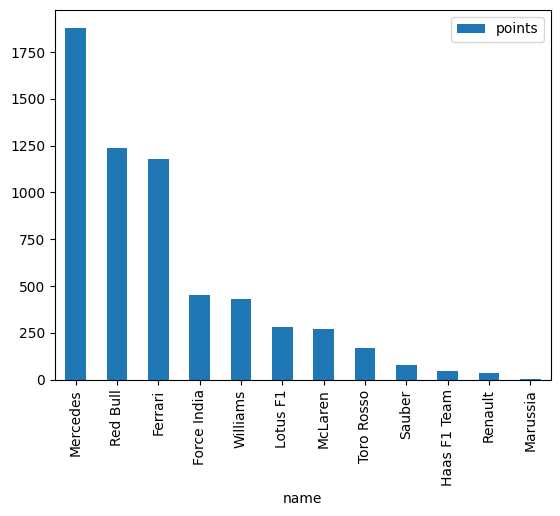

In [25]:
dfwarmclimateteam[['name','points']].sort_values(by = 'points', ascending=False).plot.bar(x = 'name',y = 'points')

In [26]:
dfcoldclimate['name'].mode()

0     Ferrari
1    Mercedes
Name: name, dtype: object

In [27]:
dfcoldclimateteam = dfcoldclimate.groupby('name').agg('sum').reset_index()
dfcoldclimateteam[['name','points']].sort_values(by = 'points', ascending=False)

,name,points
6,Mercedes,1210.0
7,Red Bull,710.0
0,Ferrari,694.0
11,Williams,340.0
1,Force India,243.0
5,McLaren,166.0
3,Lotus F1,119.0
10,Toro Rosso,74.0
8,Renault,30.0
2,Haas F1 Team,25.0


<AxesSubplot: xlabel='name'>

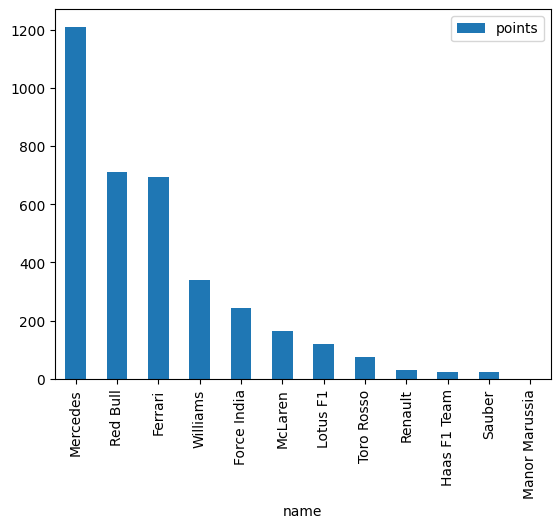

In [28]:
dfcoldclimateteam[['name','points']].sort_values(by = 'points', ascending=False).plot.bar(x = 'name',y = 'points')